In [6]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Bitcoin

In [7]:
data = pd.read_csv('../../data/processed/ETH-USD_all.csv', index_col='Date', parse_dates=True)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2906.0,1.649550e+03,1.289622e+03,8.430830e+01,3.335617e+02,1.624736e+03,2.608549e+03,4.831349e+03
High,2906.0,1.692993e+03,1.322515e+03,8.534274e+01,3.412967e+02,1.654603e+03,2.676123e+03,4.953733e+03
Low,2906.0,1.600148e+03,1.253012e+03,8.282989e+01,3.185593e+02,1.579293e+03,2.530407e+03,4.718039e+03
Open,2906.0,1.647945e+03,1.288692e+03,8.427969e+01,3.323458e+02,1.623011e+03,2.606903e+03,4.831088e+03
Volume,2906.0,1.453667e+10,1.184982e+10,6.217330e+08,6.143213e+09,1.185282e+10,1.917955e+10,7.839821e+10


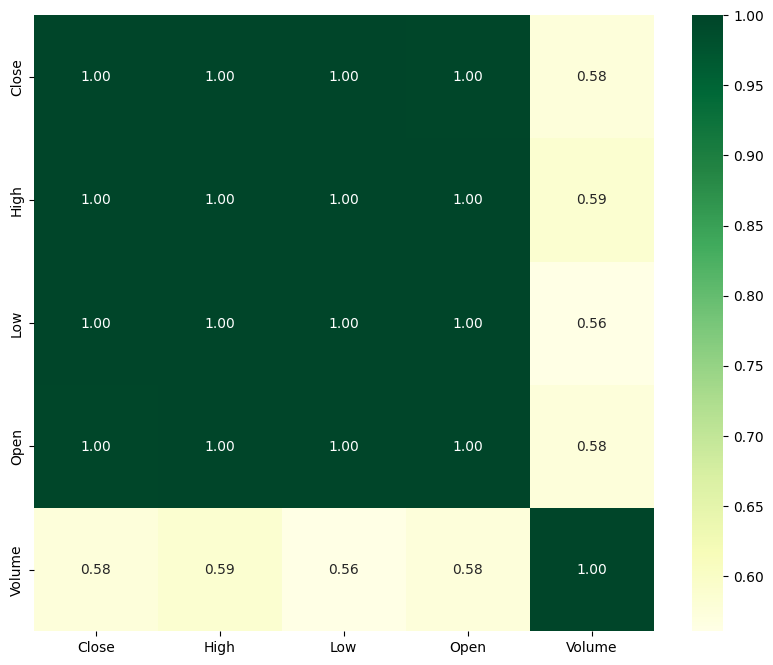

In [9]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

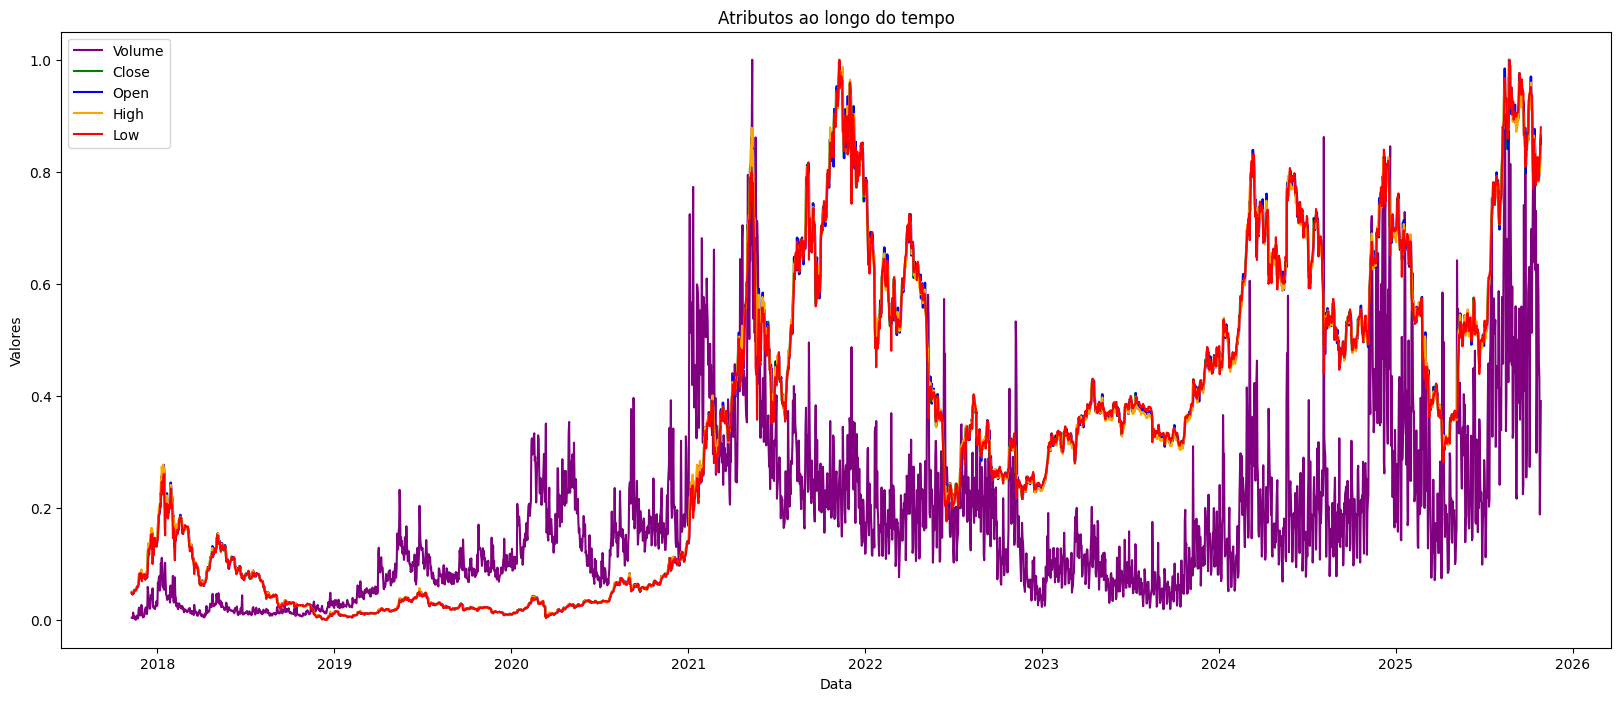

In [11]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')

plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

#### Adicionando Google Trends

In [ ]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Configuração PyTrends
pytrends = TrendReq(hl='en-US', tz=360)

# Termos que você quer pesquisar
kw_list = ["ethereum", "eth", "nft"]

# Função para gerar intervalos anuais entre datas inicial e final
def generate_halfyear_intervals(start_year, start_month, start_day, end_year, end_month, end_day):
    intervals = []
    current_start = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    final_end = pd.Timestamp(year=end_year, month=end_month, day=end_day)

    while current_start < final_end:
        current_end = current_start + pd.DateOffset(months=6) - pd.DateOffset(days=1)
        if current_end > final_end:
            current_end = final_end
        intervals.append((current_start.strftime('%Y-%m-%d'), current_end.strftime('%Y-%m-%d')))
        current_start = current_end + pd.DateOffset(days=1)
    return intervals

intervals = generate_halfyear_intervals(2017, 11, 9, 2025, 10, 27)

dfs = []

# Loop para buscar os dados de cada intervalo
for start, end in intervals:
    print(f"Buscando dados de {start} até {end}...")
    pytrends.build_payload(kw_list, cat=0, timeframe=f'{start} {end}', geo='')
    
    # Tentar pegar os dados e lidar com possíveis falhas
    try:
        df = pytrends.interest_over_time()
        if not df.empty:
            dfs.append(df)
    except Exception as e:
        print(f"Erro ao buscar dados: {e}")
    
    # Espera para não ser bloqueado
    time.sleep(60)  

# Concatenar todos os intervalos em um único DataFrame
interest_over_time_df = pd.concat(dfs)
interest_over_time_df = interest_over_time_df[~interest_over_time_df.index.duplicated(keep='first')]


Buscando dados de 2017-11-09 até 2018-05-08...
Buscando dados de 2018-05-09 até 2018-11-08...
Buscando dados de 2018-11-09 até 2019-05-08...
Buscando dados de 2019-05-09 até 2019-11-08...
Buscando dados de 2019-11-09 até 2020-05-08...
Buscando dados de 2020-05-09 até 2020-11-08...
Buscando dados de 2020-11-09 até 2021-05-08...
Buscando dados de 2021-05-09 até 2021-11-08...
Buscando dados de 2021-11-09 até 2022-05-08...
Buscando dados de 2022-05-09 até 2022-11-08...
Buscando dados de 2022-11-09 até 2023-05-08...
Buscando dados de 2023-05-09 até 2023-11-08...
Buscando dados de 2023-11-09 até 2024-05-08...
Erro ao buscar dados: The request failed: Google returned a response with code 429
Buscando dados de 2024-05-09 até 2024-11-08...
Buscando dados de 2024-11-09 até 2025-05-08...
Buscando dados de 2025-05-09 até 2025-10-27...
Erro ao buscar dados: The request failed: Google returned a response with code 429


In [13]:
# Mostrar os primeiros dados
interest_over_time_df.head(10)

,crypto,ethereum,isPartial
date,,,
2017-11-09,13,23,False
2017-11-10,13,20,False
2017-11-11,11,20,False
2017-11-12,14,23,False
2017-11-13,14,19,False
2017-11-14,14,21,False
2017-11-15,13,20,False
2017-11-16,13,18,False
2017-11-17,13,18,False


In [ ]:
# Seleciona apenas as colunas de interesse do Google Trends
trends_cols = interest_over_time_df[["ethereum", "eth", "nft"]]

# Faz o merge pelo índice de datas
data_merged = data.merge(trends_cols, left_index=True, right_index=True, how='left')


In [ ]:
data_merged.head(10)

,Close,High,Low,Open,Volume,crypto,bitcoin
Date,,,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,6,48
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,7,51
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,5,56
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,4,49
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,4,50
2014-09-22,402.152008,406.915985,397.130005,399.100006,24127600,6,52
2014-09-23,435.790985,441.557007,396.196991,402.092010,45099500,6,58
2014-09-24,423.204987,436.112000,421.131989,435.751007,30627700,7,59
2014-09-25,411.574005,423.519989,409.467987,423.156006,26814400,6,52


In [16]:
data_merged.isna().sum()

Close         0
High          0
Low           0
Open          0
Volume        0
crypto      352
ethereum    352
dtype: int64

In [18]:
# data_merged.drop(columns="bitcoin")

In [ ]:
# data_merged.to_csv('../../data/processed/ETH-USD_crypto_all.csv', index=True)

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_merged)
data_scaled = pd.DataFrame(scaled_data, columns=data_merged.columns, index=data_merged.index)

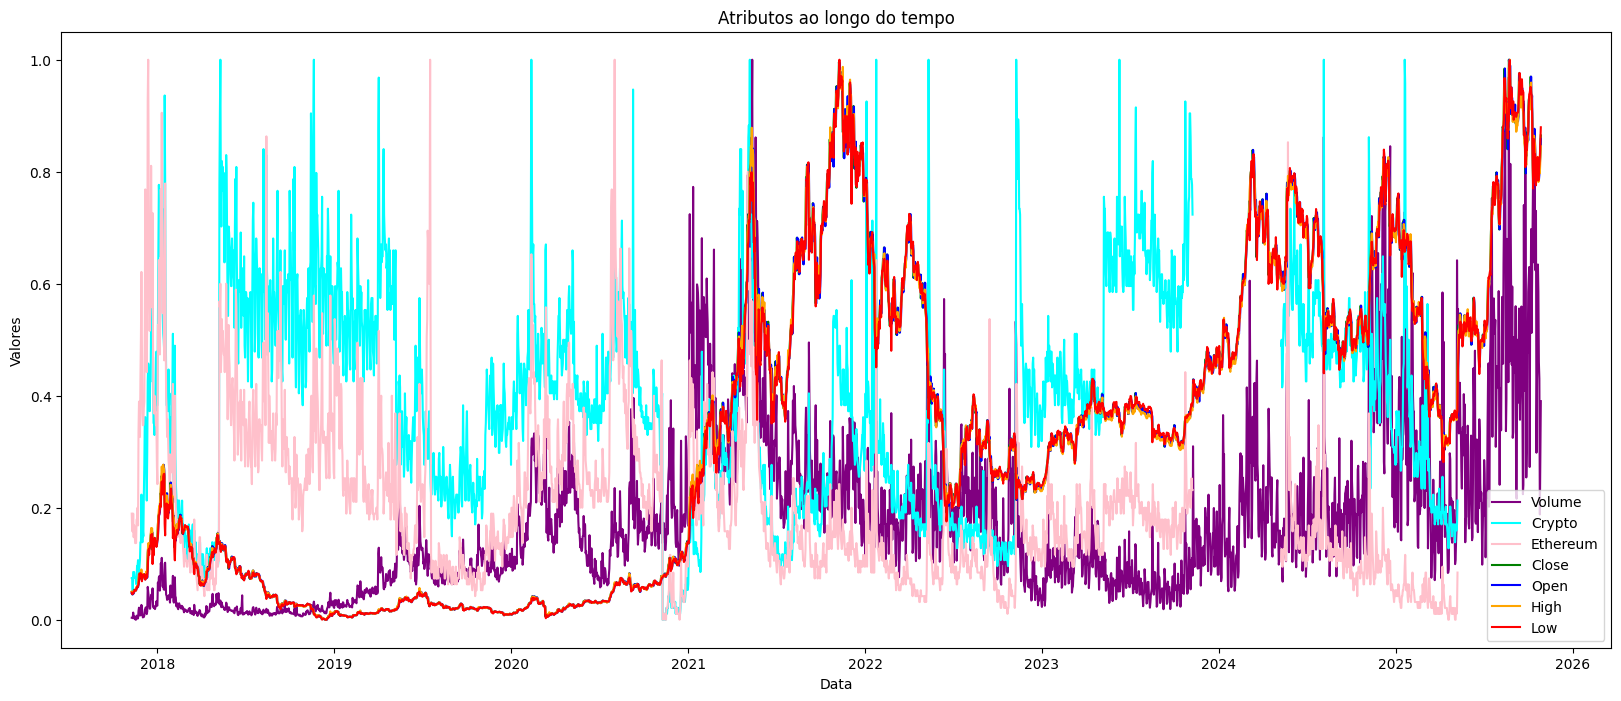

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(data_scaled.index, data_scaled['Volume'], label='Volume', color='purple')
plt.plot(data_scaled.index, data_scaled['ethereum'], label='Ethereum', color='pink')
plt.plot(data_scaled.index, data_scaled['eth'], label='ETH', color='cyan')
plt.plot(data_scaled.index, data_scaled['nft'], label='NFT', color='black')
plt.plot(data_scaled.index, data_scaled['Close'], label='Close', color='green')
plt.plot(data_scaled.index, data_scaled['Open'], label='Open', color='blue')
plt.plot(data_scaled.index, data_scaled['High'], label='High', color='orange')
plt.plot(data_scaled.index, data_scaled['Low'], label='Low', color='red')


plt.title('Atributos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.show()

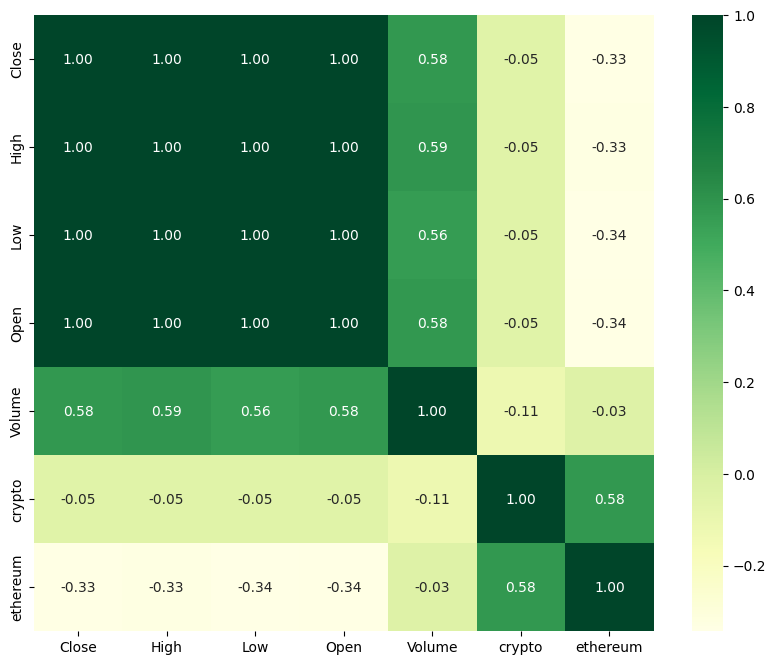

In [21]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data_merged.corr(), annot=True, cmap="YlGn", fmt=".2f")
plt.show()